# **Campus Management**
#### **Group Members:** : *Devanshi, Aneesh, Kosi*
---

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_data = pd.read_csv('../2/Train_Data.csv')
test_data = pd.read_csv('../2/Test_Data.csv')

In [4]:
train_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,F,66.552313,Central,69.552313,Central,Science,64.424403,Others,87.488358,70.979566,Mkt&HR,Yes,Placed
666,F,65.669891,Central,69.228406,Central,Arts,62.844684,Others,66.911401,60.439367,Mkt&Fin,Yes,Placed
667,F,72.000000,Central,56.000000,Others,Science,69.000000,Comm&Mgmt,55.600000,65.630000,Mkt&HR,No,Placed
668,F,42.864579,Others,47.265805,Others,Commerce,54.388593,Comm&Mgmt,68.089552,63.629286,Mkt&HR,No,Not Placed


In [5]:
test_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,M,73.163372,Central,68.535901,Central,Science,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,M,74.000000,Central,70.000000,Central,Science,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin
2,M,85.613691,Central,61.718334,Others,Science,70.962963,59.590873,60.635396,Sci&Tech,Yes,Mkt&HR
3,M,77.909979,Others,81.549151,Others,Science,69.847510,85.178574,64.304440,Sci&Tech,Yes,Mkt&Fin
4,M,80.851350,Others,66.168927,Others,Science,67.743252,87.851350,68.660478,Sci&Tech,Yes,Mkt&Fin
...,...,...,...,...,...,...,...,...,...,...,...,...
443,M,68.122510,Central,56.741700,Central,Science,65.374170,62.982258,58.989764,Sci&Tech,No,Mkt&HR
444,F,65.212090,Central,66.167810,Central,Arts,63.283831,66.657704,60.733291,Others,Yes,Mkt&Fin
445,M,73.000000,Others,58.000000,Others,Commerce,56.000000,84.000000,52.640000,Comm&Mgmt,No,Mkt&HR
446,M,49.371460,Others,40.362020,Others,Arts,64.504720,62.628540,52.115124,Comm&Mgmt,No,Mkt&Fin


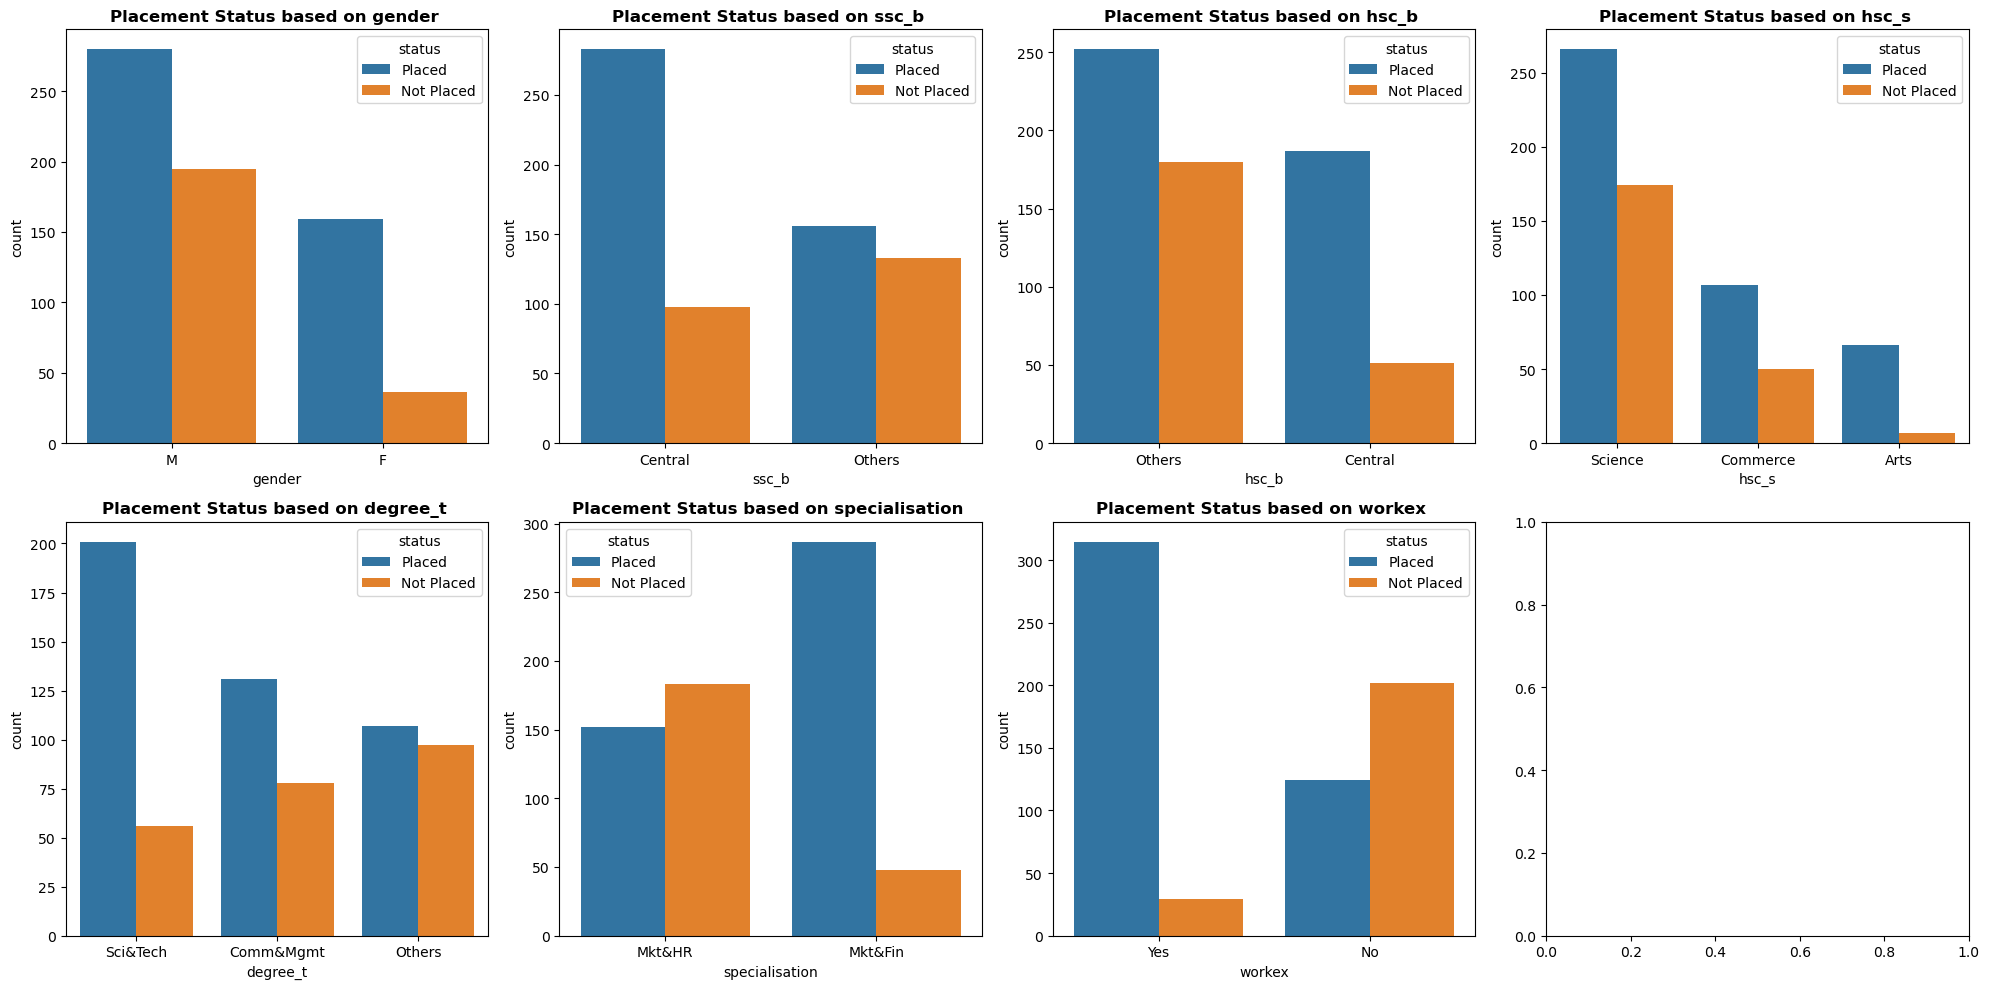

In [6]:
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'workex']


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sb.countplot(x=feature, hue='status', data=train_data,  ax=axes[i])
    # sb.lineplot(x=train_data.index, y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'Placement Status based on {feature} ',fontweight='bold')

plt.tight_layout()
plt.show()

## **Preprocessing**

In [7]:
train_data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
etest_p           0
mba_p             0
specialisation    0
workex            0
status            0
dtype: int64

> ### *No Null values, so no need to process this data*

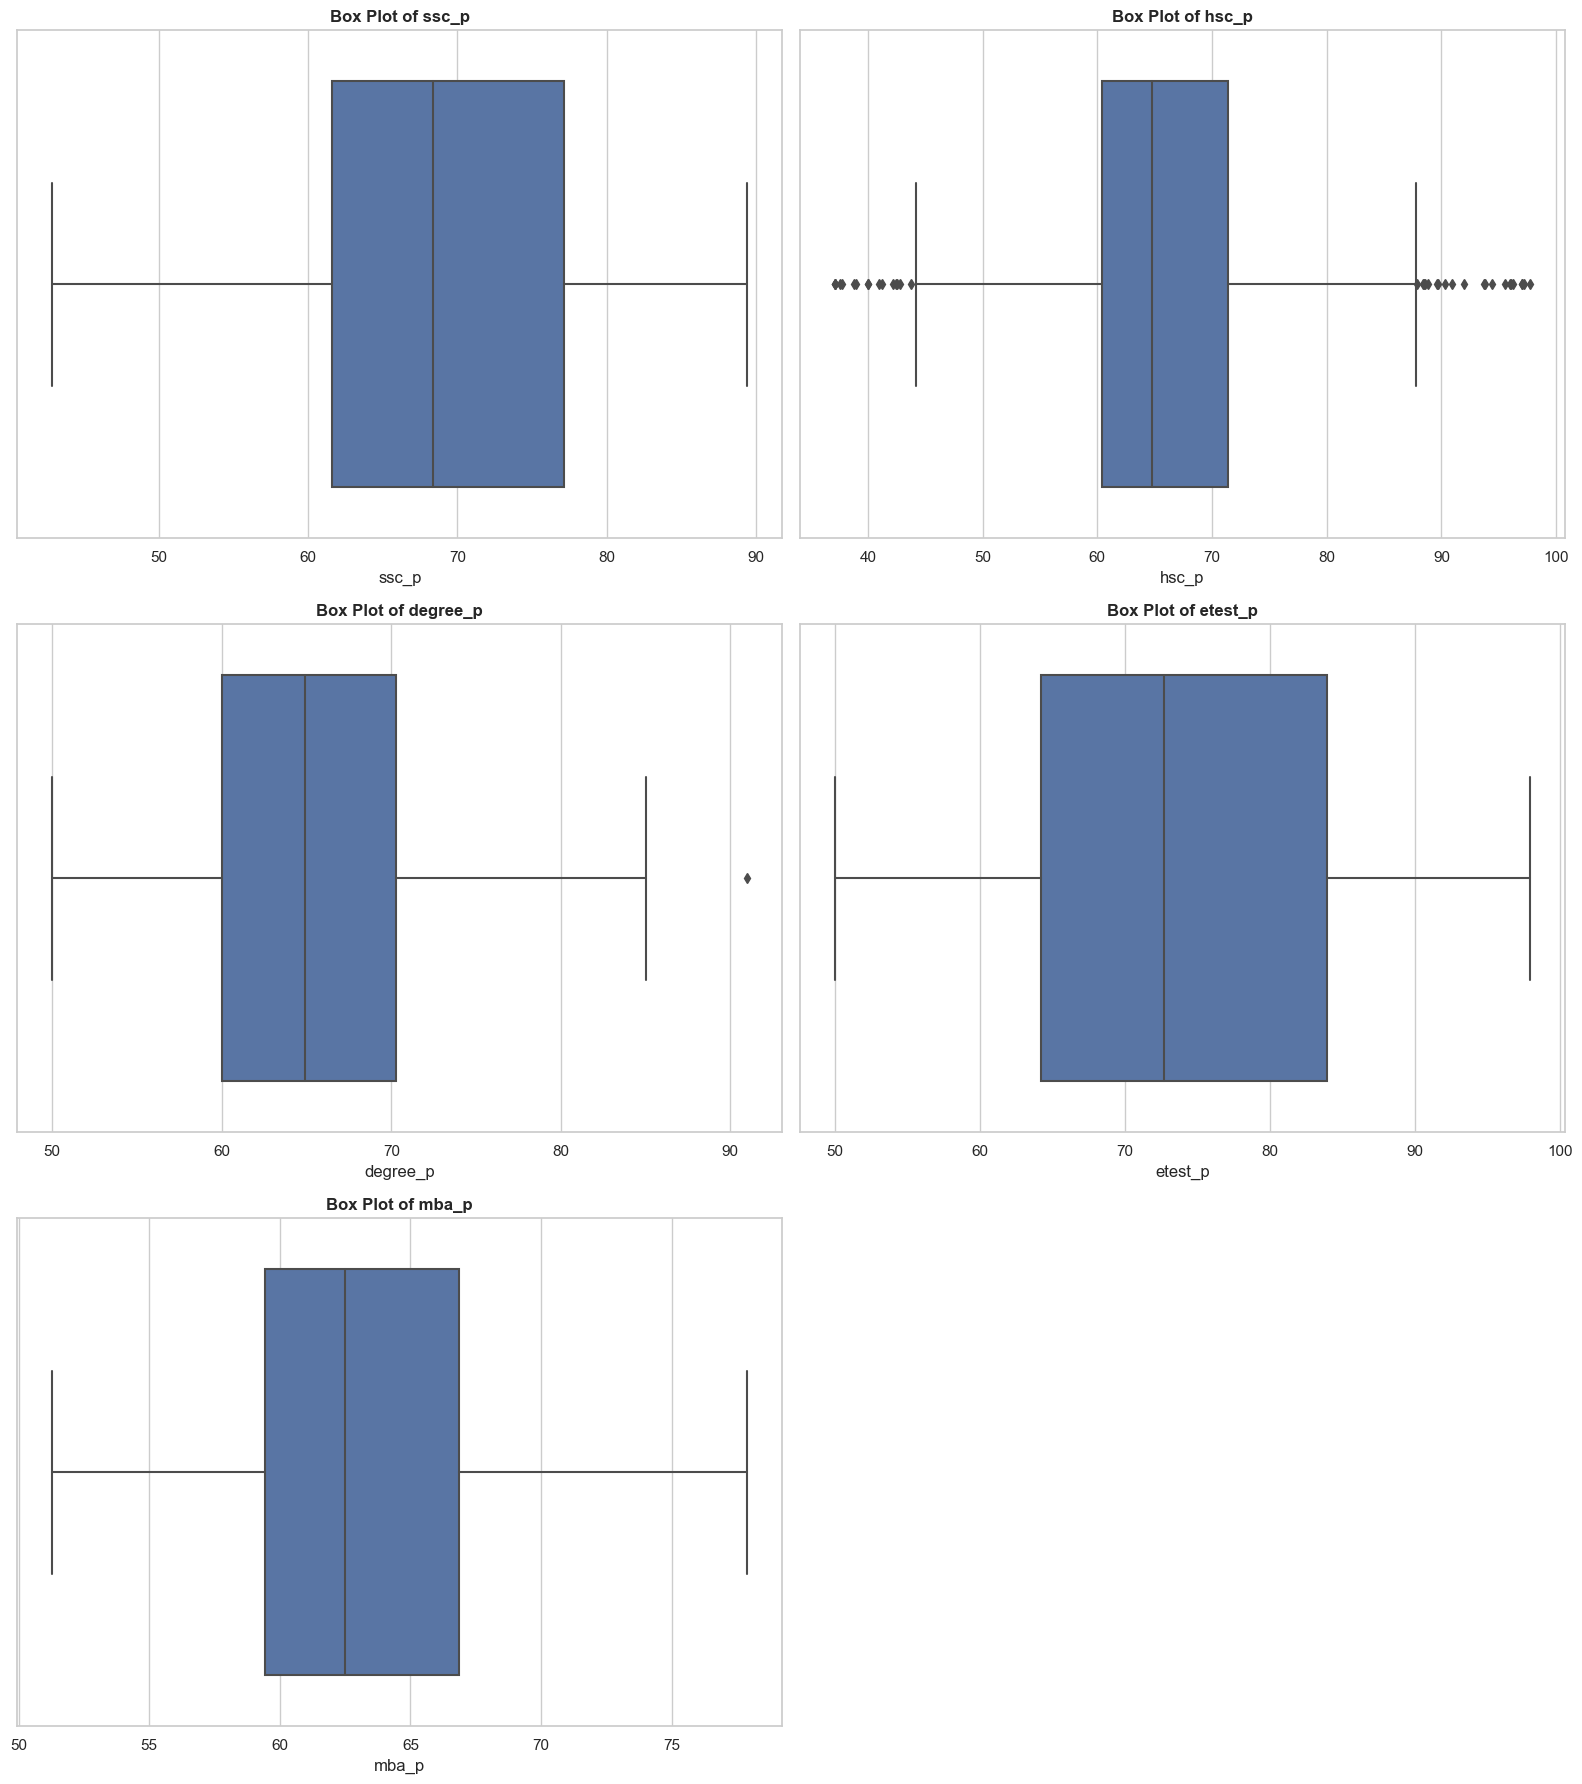

In [8]:
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(16, num_rows * 6))
sb.set(style="whitegrid") 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sb.boxplot(x=train_data[column])
    plt.title(f'Box Plot of {column}',fontweight='bold')

plt.tight_layout()
plt.show()

## **Outlier removal**

In [10]:
train_data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,670.000000,670.000000,670.000000,670.000000,670.000000
mean,68.960017,65.203006,65.229034,73.740025,62.993108
std,10.182563,11.222577,7.157608,12.101840,5.126855
min,42.864579,37.106246,50.000000,50.000000,51.290000
25%,61.619318,60.431420,60.000000,64.199327,59.431996
50%,68.332563,64.753270,64.906329,72.677821,62.481656
75%,77.130019,71.390402,70.271632,83.955186,66.864202
max,89.400000,97.700000,91.000000,97.938047,77.890000


In [11]:
Q1 = train_data['hsc_p'].quantile(0.25)
Q3 = train_data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

df_no_outliers = train_data[(train_data['hsc_p'] >= lower_whisker) & (train_data['hsc_p'] <= upper_whisker)]


In [12]:
df_no_outliers

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,M,80.597596,Others,68.804809,Others,Science,67.219236,Sci&Tech,90.585573,65.972390,Mkt&Fin,Yes,Placed
665,F,66.552313,Central,69.552313,Central,Science,64.424403,Others,87.488358,70.979566,Mkt&HR,Yes,Placed
666,F,65.669891,Central,69.228406,Central,Arts,62.844684,Others,66.911401,60.439367,Mkt&Fin,Yes,Placed
667,F,72.000000,Central,56.000000,Others,Science,69.000000,Comm&Mgmt,55.600000,65.630000,Mkt&HR,No,Placed


> ### *Removed 37 records after removing outliers from the data*

## **One hot encoding**

#### *Performing One hot encoding to covert categorical data to numerical*

In [13]:
df_encoded = pd.get_dummies(train_data)
df_encoded = df_encoded.astype(int)

In [14]:
df_encoded

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_No,workex_Yes,status_Not Placed,status_Placed
0,73,77,73,84,67,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,62,62,60,63,52,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,80,67,72,91,71,0,1,0,1,0,...,1,0,0,1,1,0,1,0,0,1
3,52,65,57,75,59,0,1,0,1,0,...,0,0,1,0,1,0,0,1,1,0
4,69,62,66,75,67,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,66,69,64,87,70,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
666,65,69,62,66,60,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
667,72,56,69,55,65,1,0,1,0,0,...,1,1,0,0,0,1,1,0,0,1
668,42,47,54,68,63,1,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0


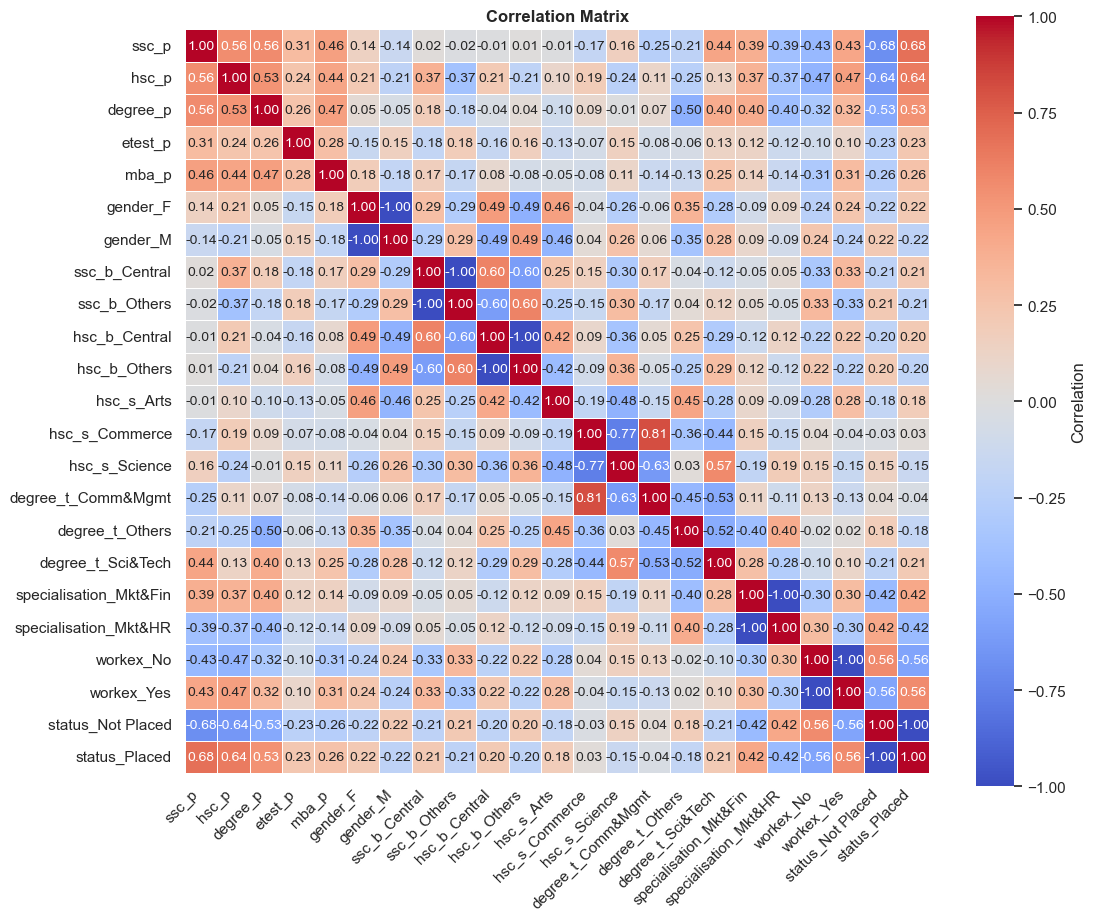

In [15]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, cbar_kws={'label': 'Correlation'}, annot_kws={'size': 10}, square=True)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.title('Correlation Matrix',fontweight='bold')
plt.show()

## **Observations** - Most correlation with whether someone gets placed or not

In [17]:
correlation5 = correlation_matrix['status_Not Placed'].abs().sort_values(ascending=False).head(8)[1:]
print(correlation5)


status_Placed             1.000000
ssc_p                     0.683890
hsc_p                     0.636244
workex_Yes                0.562952
workex_No                 0.562952
degree_p                  0.533427
specialisation_Mkt&Fin    0.423931
Name: status_Not Placed, dtype: float64


> #### *The top 5 correlated features to students placed are - ssc_p, hsc_p, workex, degree, specialization*

In [ ]:
df_encoded

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_No,workex_Yes,status_Not Placed,status_Placed
0,73,77,73,84,67,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,62,62,60,63,52,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,80,67,72,91,71,0,1,0,1,0,...,1,0,0,1,1,0,1,0,0,1
3,52,65,57,75,59,0,1,0,1,0,...,0,0,1,0,1,0,0,1,1,0
4,69,62,66,75,67,1,0,1,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,66,69,64,87,70,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
666,65,69,62,66,60,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,1
667,72,56,69,55,65,1,0,1,0,0,...,1,1,0,0,0,1,1,0,0,1
668,42,47,54,68,63,1,0,0,1,0,...,0,1,0,0,0,1,1,0,1,0
